**Predicting electric motor temperature / insurance charges with a regression model using Gradient Descent**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sb
import os
dataset = 'measures_v2' #'insurance'
data = pd.read_csv(os.getcwd()+'/datasets/'+dataset+'.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/sphinx/.local/share/Trash/files/machine-learning/datasets/measures_v2.csv'

In [ ]:
data

In [ ]:
# for insurance.csv
if dataset == 'insurance':
# one hot encoding and concatenating
    s = pd.Series(data['sex'])
    one_hot_encoded = pd.get_dummies(s)

    ohe_df = pd.DataFrame(one_hot_encoded)

    preprocessed_data = pd.concat([data['age'], ohe_df], axis=1)

    preprocessed_data = pd.concat([preprocessed_data, data['bmi']], axis=1)

    preprocessed_data = pd.concat([preprocessed_data, data['children']], axis=1)

    s = pd.Series(data['smoker'])
    one_hot_encoded = pd.get_dummies(s)

    ohe_df = pd.DataFrame(one_hot_encoded)

    preprocessed_data = pd.concat([preprocessed_data, ohe_df], axis=1)

    s = pd.Series(data['region'])
    one_hot_encoded = pd.get_dummies(s)

    ohe_df = pd.DataFrame(one_hot_encoded)

    preprocessed_data = pd.concat([preprocessed_data, ohe_df], axis=1)

    preprocessed_data = pd.concat([preprocessed_data, data['charges']], axis=1)
    data = preprocessed_data


In [ ]:
plt.figure(figsize=(12,10))
cor = data.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
target = "stator_tooth" #stator_yoke, pm, stator_tooth, stator_winding, coolant
#Correlation with output variable
cor_target = abs(cor[target]) # cor[target]
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.30]
relevant_features

In [ ]:
np.array(relevant_features.keys())

In [ ]:
features = np.array(relevant_features.keys())
data = data[features]
data

In [ ]:
# split data into input and output variables
y = data[target]
X = data.drop(target, axis=1)

In [ ]:
target_mu = np.mean(data[target])
target_std = np.std(data[target])

In [ ]:
def featureNormalization(data):
    mu  = np.mean(data)
    std = np.std(data)
    return (data - mu) / (std)

In [ ]:
X_norm = featureNormalization(X)
y_norm = featureNormalization(y)

In [42]:
#split into train and test data
X_train_data = X_norm[0:int(len(X_norm)*0.8)]
X_test_data  = X_norm[int(len(X_norm)*0.8)::]

In [43]:
#split into train and test data
Y_train_data = np.array(y_norm[0:int(len(y_norm)*0.8)])
Y_test_data  = np.array(y_norm[int(len(y_norm)*0.8)::])

In [44]:
m = len(X_train_data)

In [45]:
#  Add intercept term to data
X_train_data = np.append(np.ones([m, 1], dtype=np.int32), X_train_data, axis=1)

In [46]:
def computeCostMulti(X, y, theta):
    m = len(y)
    theta = np.array(theta)
    J = (1/(2*m))*((np.square(( X @ theta - y))).sum())
    return J

In [47]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    J_history = np.zeros(iterations)
    m = len(y)
    for i in range(iterations):
        theta = np.subtract(theta, alpha * (1/m) * (( (X @ theta) - y ).transpose() @ X).transpose())
        J_history[i] = computeCostMulti(X, y, theta);
    return theta, J_history

In [48]:
theta = np.zeros((len(X_train_data.transpose()), 1));
alpha     =  0.01
num_iters =  250; 

In [49]:
Y_train_data = np.expand_dims(Y_train_data, axis=1)

In [50]:
[theta, J_history] = gradientDescentMulti(X_train_data, Y_train_data, theta, alpha, num_iters);

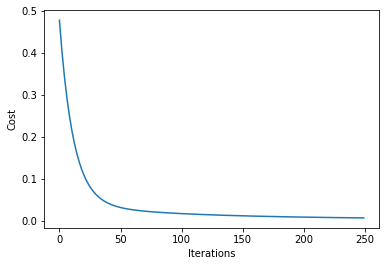

In [51]:
x = np.arange(len(J_history))
plt.plot(x, J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [52]:
X_test_data = np.append(np.ones([len(X_test_data), 1], dtype=np.int32), X_test_data, axis=1)

In [53]:
y_test_out = X_test_data @ theta 

In [54]:
y_test_out = np.array(y_test_out)
Y_test_data = np.array(Y_test_data)

In [55]:
r2_score(Y_test_data, y_test_out.ravel())

0.9718618938450825

In [56]:
mean_squared_error(Y_test_data, y_test_out.ravel())

0.019530927085455296

In [57]:
observation_pair_list = []
for i in range(len(Y_test_data)):
    observation_pair_list.append([Y_test_data[i], y_test_out.ravel()[i]])

In [58]:
observation_pair_list.sort()

In [59]:
y_true = np.array(list(zip(*observation_pair_list))[0])*target_std+target_mu

In [60]:
y_pred = np.array(list(zip(*observation_pair_list))[1])*target_std+target_mu

In [61]:
limit = int(len(y_true)/1)

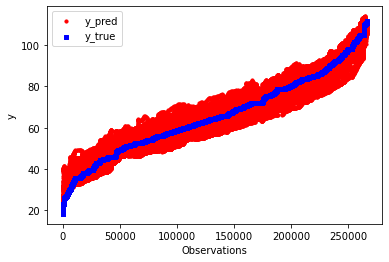

In [62]:
Y_plot = y_true[0:limit] 
y_out  = y_pred[0:limit]
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = np.arange(len(Y_plot))
ax1.scatter(x, y_out, s=10, c='r', marker="o", label='y_pred')
ax1.scatter(x, Y_plot, s=10, c='b', marker="s", label='y_true')
plt.legend(loc='upper left');
plt.xlabel('Observations')
plt.ylabel('y')
plt.show()

In [63]:
############################################### SKLEARN MODELS ##################################################

In [64]:
Y_test_data = np.array(Y_test_data).ravel()
Y_train_data = np.array(Y_train_data).ravel()

In [65]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=250, tol=1e-3, alpha=0.01)
reg.fit(X_train_data, Y_train_data)
reg.score(X_test_data, Y_test_data)

0.9970433772505257

In [66]:
mean_squared_error(Y_test_data, reg.predict(X_test_data))

0.0020522199689366233

In [67]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_data, Y_train_data)
reg.score(X_test_data, Y_test_data)

0.99811348413674

In [68]:
mean_squared_error(Y_test_data, reg.predict(X_test_data))

0.0013094486021209442

In [69]:
############################################### SKLEARN MODELS ##################################################